In [3]:
import numpy as np

In [4]:

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import HGate, XGate, YGate, ZGate, TGate, SGate, CXGate, CYGate, CZGate, SwapGate

In [17]:
# from qiskit.quantum_info import random_statevector
# state = random_statevector(2) # note: the parameter you pass is the number of entries in the vector, not the number of qubits
# print(state)
# print(state.data)
# qc.initialize(state.data, [0,1])

Statevector([0.2765638 -0.8197015j , 0.43084421-0.25685634j],
            dims=(2,))
[0.2765638 -0.8197015j  0.43084421-0.25685634j]


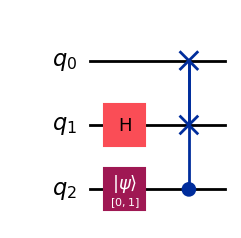

In [20]:
# (i) Build a simple noise model with depolarizing noise
def bit_flip(p):
    
    return None

def phase_flip(p):
    
    return None

def depolarizing_channel(p):
    qcirc = QuantumCircuit(3)

    qcirc.h(1)
    
    # qcirc.unitary([[1-p, p], [p, (1-p)]], 2)
    qcirc.initialize([np.sqrt(1-p), np.sqrt(p)], 2)

    qcirc.append(SwapGate().control(1), [2, 0, 1])

    return qcirc

qcirc_dc = depolarizing_channel(1)
qcirc_dc.draw("mpl")

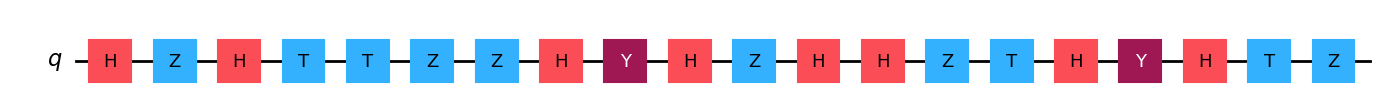

In [33]:
# (ii) Create different circuits to test your noise models and choose the observable to measure
gate_population = [
    [HGate, XGate, YGate, ZGate, TGate, SGate],
]

def randomized_benchmarking_circuit(n_gates):
    qcirc = QuantumCircuit(1)

    gate_sample_1q = np.random.choice(gate_population[0], n_gates)
    
    for i in range(2):
        shuffled_gates = np.random.permutation(gate_sample_1q)

        for gate in shuffled_gates:
            qcirc.append(gate(), [0])
    
    return qcirc

def benchmark_noise(noise_model):
    # noise model

    # for each 
    qcirc = randomized_benchmarking_circuit(10)

    return qcirc.draw("mpl")

benchmark_noise()

In [ ]:
# (iii) Apply the unitary folding method
def unitary_folding(gate, n):
    qcirc = QuantumCircuit()

    qcirc.append(gate)

    for i in range(n):
        qcirc.append(gate)
        qcirc.append(gate)

    return None

In [ ]:
# (iv) Apply the extrapolation method to get the zero-noise limit. Different extrapolation methods achieve different results, such as Linear, polynomial, and exponential.


In [ ]:
# (v) Compare mitigated and unmitigated results


In [ ]:
# (vi) Bonus: Run your ZNE function in real quantum hardware through the IBM Quantum Service
